In [11]:
import json 
import numpy as np
from tqdm import tqdm_notebook

model = 'gpt2'
filter = 'filtered'
split = 'dev'
dataset = 'winobias'

# Plot y_{set-gender,z_set-gender}(u) - y_{set-gender,z_null(u)}(u) by
#  	 y_{null,z_set-gender(u)}(u) -  y_{null,z_null} (u)

fname = f"{dataset}_data/attention_intervention_{model}_{filter}_{split}.json"
with open(fname) as f:
	data = json.load(f)
x = []
y = []
for result in data['results']:
	y_null_z_set_gender = np.array(result['indirect_odds_head'])
	y_null_z_null = np.array(result['odds_base'])
	x.extend((y_null_z_set_gender - y_null_z_null).flatten().tolist())
	y_set_gender_z_set_gender = np.array(result['odds_alt']) 
	y_set_gender_z_null = np.array(result['direct_odds_head'])
	y.extend((y_set_gender_z_set_gender - y_set_gender_z_null).flatten().tolist())
	
assert len(x) == len(y) == 144 * len(data['results'])
	

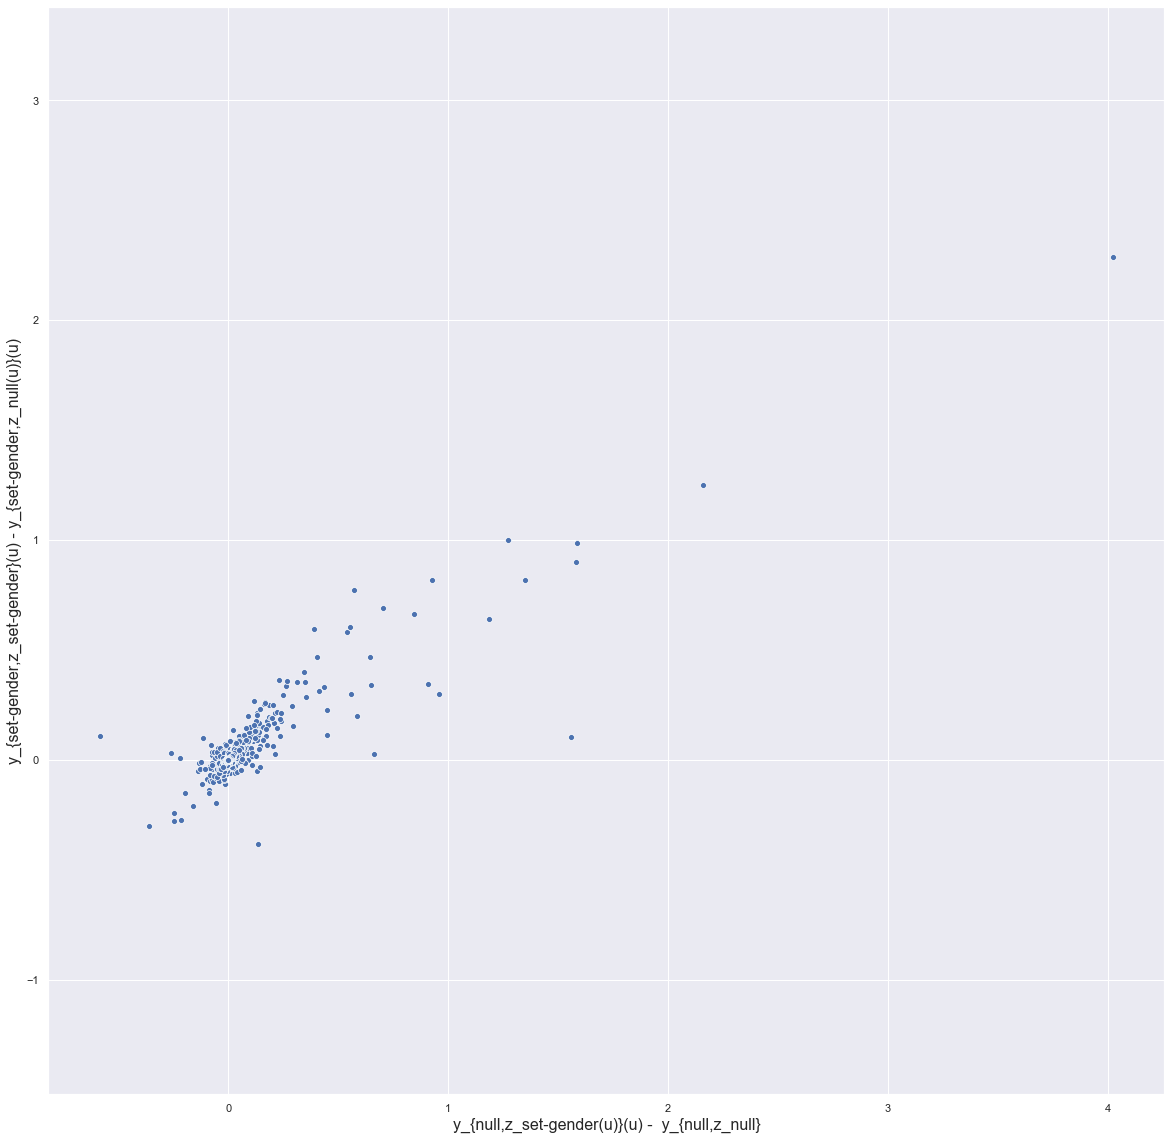

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
sns.set(rc={'figure.figsize':(20, 20)})
plt.axis('equal')
plt.xlabel('y_{null,z_set-gender(u)}(u) -  y_{null,z_null}', fontsize=20)
plt.ylabel('y_{set-gender,z_set-gender}(u) - y_{set-gender,z_null(u)}(u)', fontsize=20)
sns.scatterplot(x, y)
